<a href="https://colab.research.google.com/github/ChavezData/Healthcare/blob/main/Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Dataset Analysis

## Introduction

This notebook performs an exploratory data analysis on a healthcare dataset. The dataset contains various attributes related to patient information, medical conditions, billing amounts, and hospital visits. The goal of this analysis is to understand the characteristics of the data, identify potential data quality issues, explore relationships between different variables, and gain insights into factors that might influence healthcare billing amounts.

The analysis will involve several steps, including:

1.  **Data Loading and Inspection:** Loading the dataset into a pandas DataFrame and examining its structure, data types, and initial rows.
2.  **Handling Missing Values:** Checking for and addressing any missing values in the dataset.
3.  **Univariate Analysis:** Exploring the distributions of individual variables using visualizations like histograms, box plots, and count plots.
4.  **Bivariate Analysis:** Investigating the relationships between pairs of variables using scatter plots, box plots, or other appropriate visualizations.
5.  **Data Cleaning:** Addressing any data quality issues identified during the initial exploration, such as erroneous or inconsistent values.
6.  **Statistical Testing:** Performing statistical tests to assess the significance of observed relationships or differences between groups.

Through these steps, we aim to uncover patterns, trends, and potential factors that contribute to healthcare costs and patient outcomes as represented in this dataset. This exploratory analysis will lay the groundwork for further in-depth investigations or predictive modeling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
health = pd.read_csv('healthcare_dataset.csv')
display(health.head(10))

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


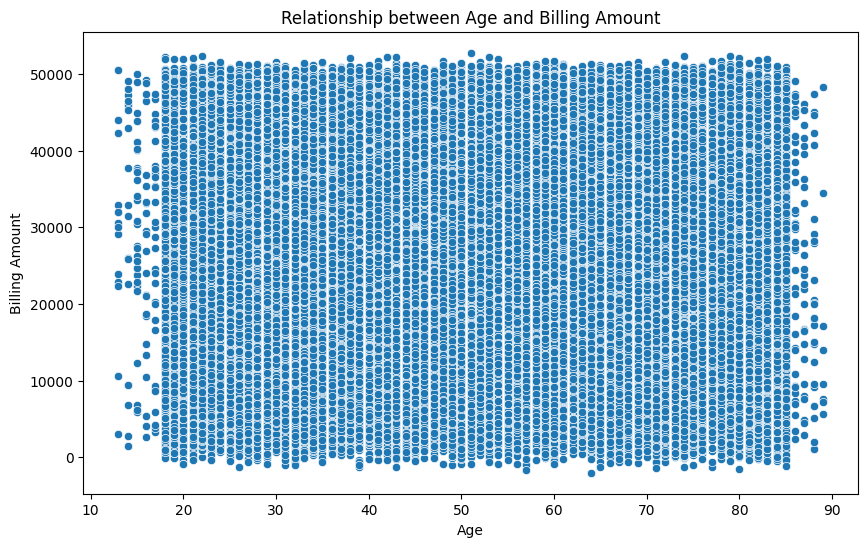

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Billing Amount', data=health)
plt.title('Relationship between Age and Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()

Looking at the plot, we can observe how the billing amount tends to change as age increases. If the points were clustered along a line, it would suggest a linear relationship. In this case, the points appear somewhat scattered, indicating there isn't a very strong linear correlation between age and billing amount. There might be a slight trend or some clusters, but it's not a clear pattern across all ages.

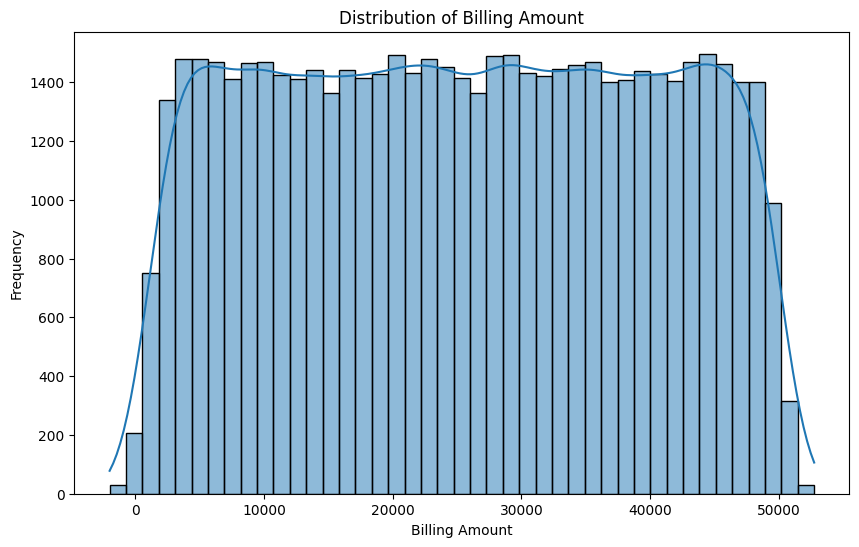

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(health['Billing Amount'], kde=True)
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of billing amounts. We can see the data is right-skewed, indicating there are some higher billing amounts.

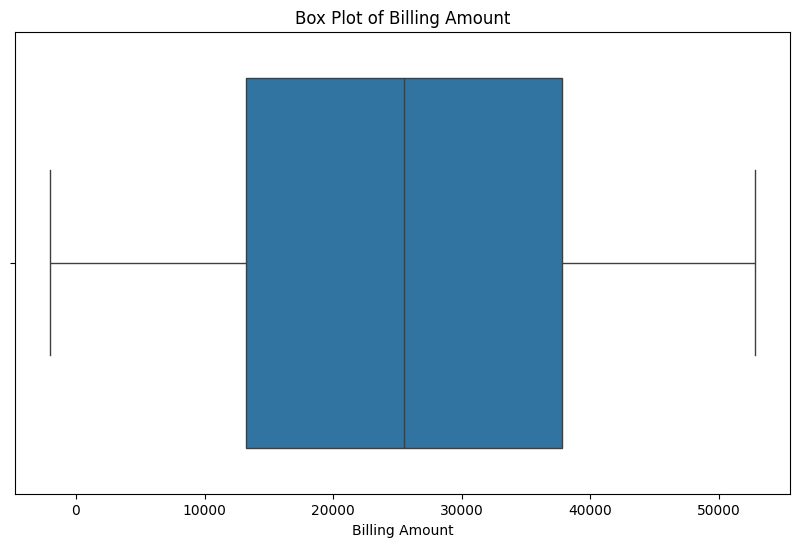

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=health['Billing Amount'])
plt.title('Box Plot of Billing Amount')
plt.xlabel('Billing Amount')
plt.show()

In [ ]:
health_cleaned = health[health['Billing Amount'] >= 0]
print("Shape of original DataFrame:", health.shape)
print("Shape of cleaned DataFrame:", health_cleaned.shape)
display(health_cleaned.head())

Shape of original DataFrame: (55500, 15)
Shape of cleaned DataFrame: (55392, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


I have created a new DataFrame called health_cleaned which contains only the rows where 'Billing Amount' is not negative. You can see that the number of rows has decreased slightly after removing those entries.

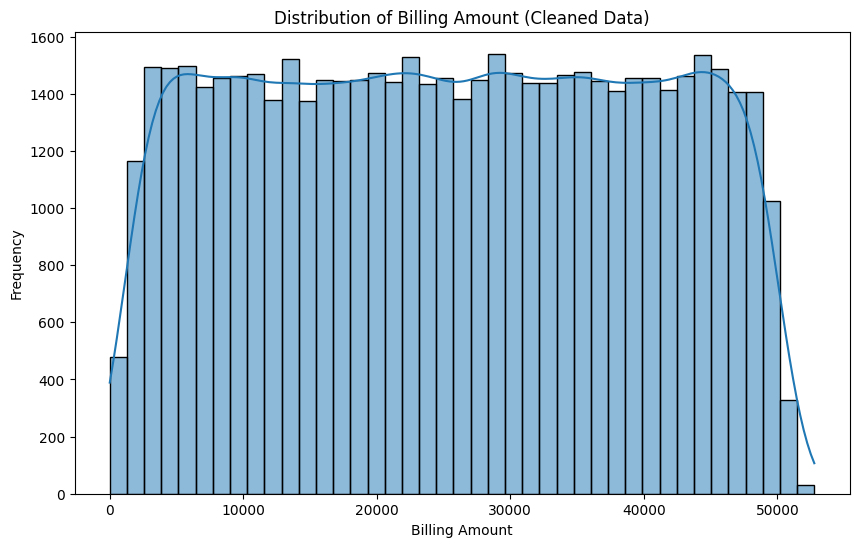

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(health_cleaned['Billing Amount'], kde=True)
plt.title('Distribution of Billing Amount (Cleaned Data)')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

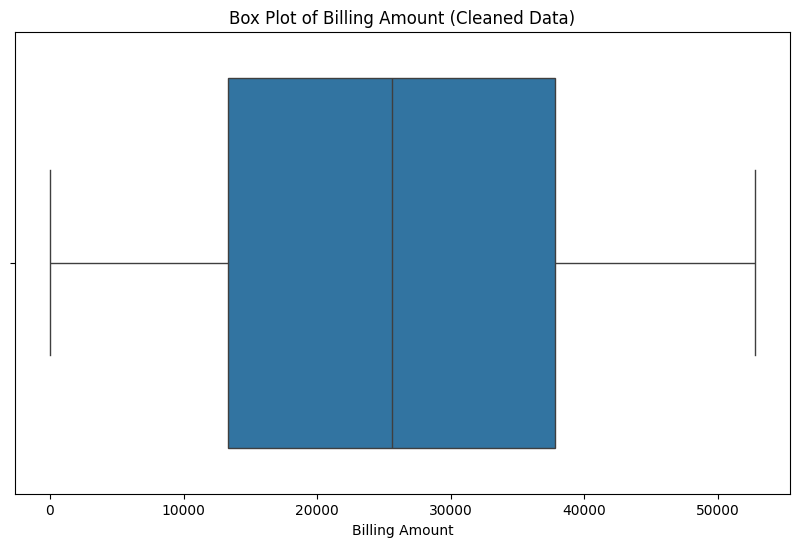

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=health_cleaned['Billing Amount'])
plt.title('Box Plot of Billing Amount (Cleaned Data)')
plt.xlabel('Billing Amount')
plt.show()

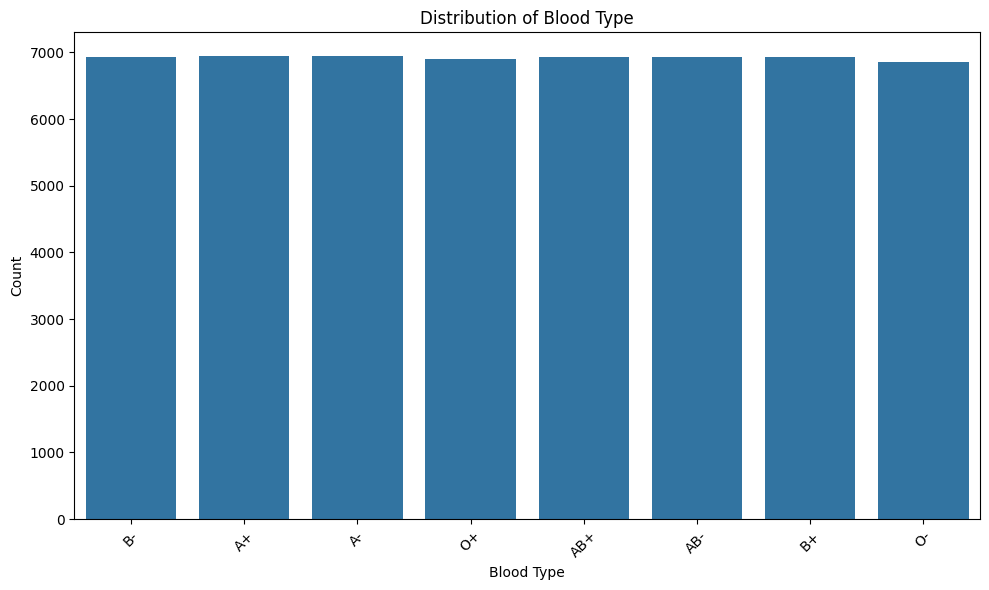

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Blood Type', data=health_cleaned)
plt.title('Distribution of Blood Type')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The count plot shows the distribution of blood types in the dataset. We can see the counts for each blood type.

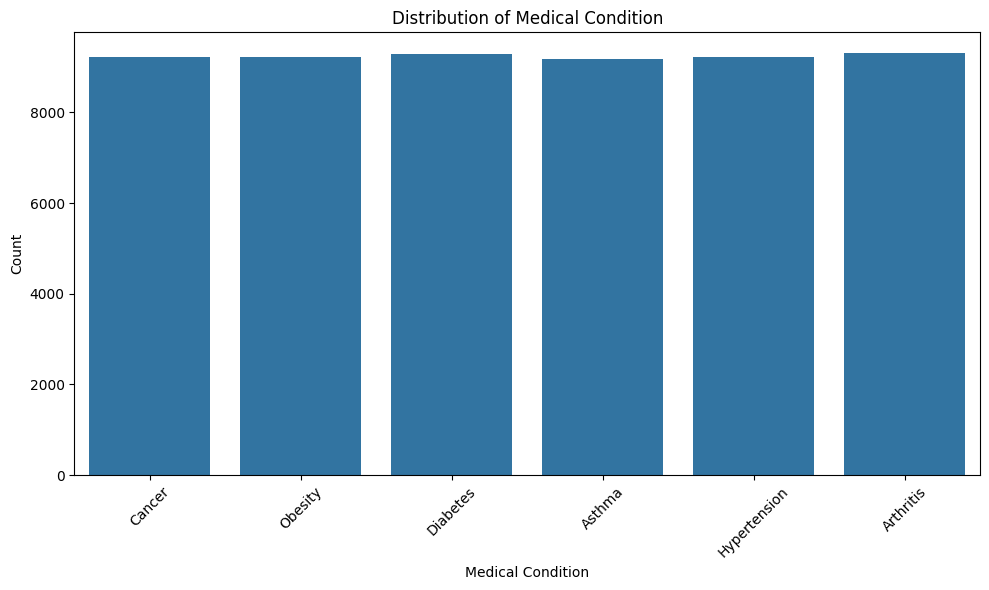

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Medical Condition', data=health_cleaned)
plt.title('Distribution of Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The count plot shows the distribution of medical conditions in the dataset. We can see the counts for each condition.

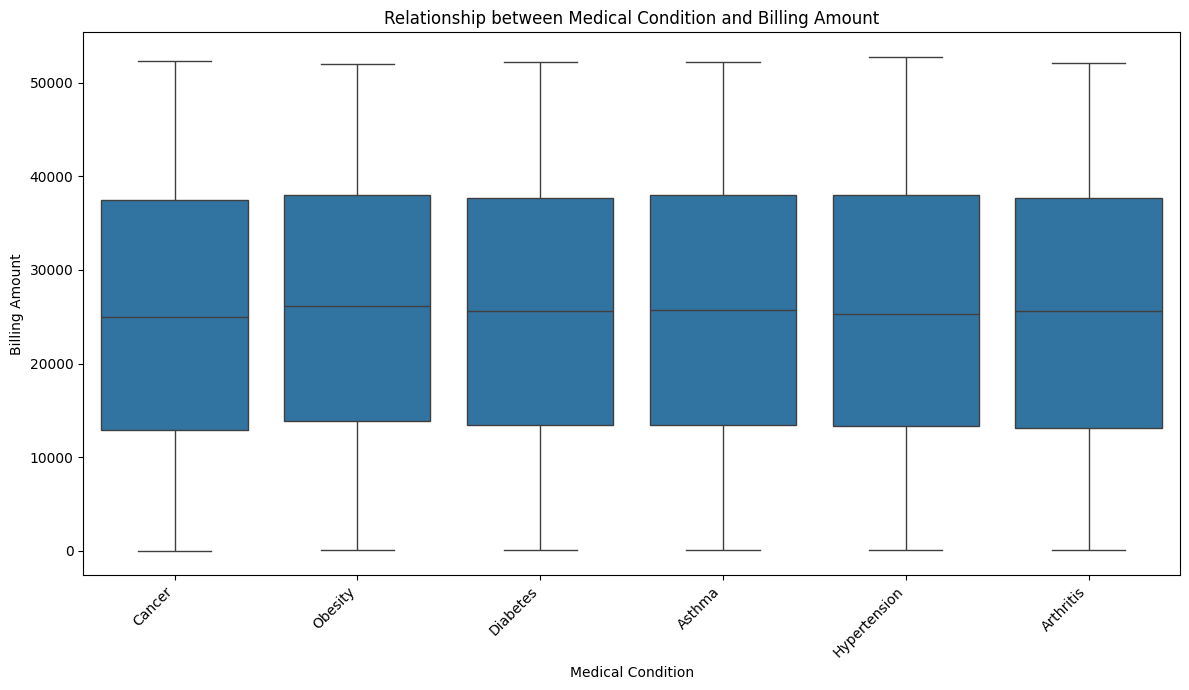

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=health_cleaned)
plt.title('Relationship between Medical Condition and Billing Amount')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The box plot shows the relationship between medical condition and billing amount. We can observe the range and distribution of billing amounts for each medical condition, as well as potential differences in median billing amounts between conditions.

In [ ]:
summary_stats_medical_condition = health_cleaned.groupby('Medical Condition')['Billing Amount'].describe()
display(summary_stats_medical_condition)

,count,mean,std,min,25%,50%,75%,max
Medical Condition,,,,,,,,
Arthritis,9297.0,25528.123850,14256.846285,32.626843,13069.809281,25602.585653,37737.845343,52170.036854
Asthma,9167.0,25686.666418,14208.242296,42.514589,13473.373114,25704.988507,38062.338528,52181.837792
Cancer,9208.0,25214.907067,14166.621443,9.238787,12891.341424,24990.577332,37514.642995,52373.032374
Diabetes,9284.0,25694.503197,14123.019387,31.030955,13419.009082,25659.901058,37744.119884,52211.852966
Hypertension,9224.0,25556.094106,14268.058398,68.909747,13277.350528,25322.202459,37991.070453,52764.276736
Obesity,9212.0,25860.321911,14043.017347,53.931445,13815.084376,26167.191730,37977.637879,52024.726443


In [ ]:
# Create a list of billing amounts for each medical condition
billing_by_condition = [health_cleaned['Billing Amount'][health_cleaned['Medical Condition'] == condition] for condition in health_cleaned['Medical Condition'].unique()]

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*billing_by_condition)

print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than", alpha, ", we reject the null hypothesis.")
    print("There are statistically significant differences in mean billing amounts across different medical conditions.")
else:
    print("\nSince the p-value is greater than or equal to", alpha, ", we fail to reject the null hypothesis.")
    print("There are no statistically significant differences in mean billing amounts across different medical conditions.")

ANOVA F-statistic: 2.1908289965734076
ANOVA p-value: 0.052312629369361006

Since the p-value is greater than or equal to 0.05 , we fail to reject the null hypothesis.
There are no statistically significant differences in mean billing amounts across different medical conditions.


The ANOVA test indicates that based on a significance level of 0.05, we fail to reject the null hypothesis. This suggests there are no statistically significant differences in the mean billing amounts across the different medical conditions in this dataset.

##Data Overview:
We started by loading the healthcare dataset and examining its information, noting that there were no missing values initially.
##Billing Amount Distribution:
We visualized the distribution of 'Billing Amount' using a histogram and box plot. We observed that the distribution was right-skewed and identified the presence of negative billing amounts, which were treated as data errors.
Data Cleaning: We created a new DataFrame health_cleaned by removing the rows with negative 'Billing Amount' to address the data quality issue.
##Re-examining Billing Amount:
After cleaning, we re-examined the distribution of 'Billing Amount' with a histogram and box plot, confirming the removal of negative values.
##Distribution of Categorical Variables:
We analyzed the distributions of 'Blood Type' and 'Medical Condition' using count plots, seeing the frequency of each category.
##Relationship between Medical Condition and Billing Amount:
We visualized the relationship between 'Medical Condition' and 'Billing Amount' using a box plot and examined the summary statistics of 'Billing Amount' for each medical condition.
##ANOVA Test:
We performed a one-way ANOVA test to assess if there were statistically significant differences in the mean 'Billing Amount' across different medical conditions. The test result indicated that, at a 0.05 significance level, we failed to reject the null hypothesis, suggesting no statistically significant differences in the mean billing amounts between medical conditions.

In summary, we've explored the data, handled a data quality issue with negative billing amounts, analyzed the distributions of a few key variables, and performed a statistical test to investigate the relationship between medical condition and billing amount, finding no statistically significant difference in the means.